# Twitter trolls - how Russia meddles with western democracies


## Abstract
Over the last several years there has been an attempt from Russian trolls to spread propaganda and fake news over social media in order to spread political ideas among the general population both nationally and internationally. Can these attempts be regarded as undermining the democracy of the affected countries?

In this project we are going to analyze a great number of these russian tweets and look into their motivations for this meddling. We will mainly look into their overall political goals in the US, and examine how these goals change over time. Have the trolls achieved their goals? We will also look into how the trolls operate and organize themselves, trying to find patterns in the madness. Such patterns can hopefully help the general population to indicate that a tweet is originating from a troll. As the Russian efforts are increasing every year, a solution is needed to defend the democracy.

## Research questions

-Which themes does the propaganda mainly revolve around? About which issues should people be particularly careful not to believe everything they read?

Darren: "A lot of this has been done . . . at least with the English language data. More needs to be done on the European data."

-Does the trolls advocate for a common political stance in each specific country? If so which leaning do they have? If not, how polarized are the tweets between left leaning and right leaning?

Darren comment: Again, this has been done on the English language data. I'm unaware to what extent it has been done on the European data. I would highly recommend looking closely at the German data. There is a good volume there and I have not spoken to anyone working with it. I tried to get a story in Der Speigel and spoke at length with a journalist there, but nothing came of it.

-Were the trolls united with a common political leaning in the period after the primaries in the US elections?

Darren comment: 
Some of this analysis appears in the fivethirtyeight article.

-Was the original mission of the Russian trolls for the US election to make sure that Clinton was not elected, or to get Trump elected?

Darren: done

-Are the trolls organized as a unit? Do they interact with each other (retweets, etc)?

Darren: interesting

-Is there a way for people without a technical background to determine if a tweet is coming from a Russian troll?

## Research questions

IRA russian twitter trolls - Three million tweets amounting to 175 Mb, along with a detailed description of the dataset

This dataset contains around three million tweets and retweets from 2848 unique twitter users. Each tweet has several attributes, some of them are extracted from the tweet itself. For instance the author, content, and time stamp. Other attributes are later added. An example of such attributes is category of the troll, e.g. RightTroll, NewsFeed, etc.

There are many factors that we can examine in the dataset. Looking at given features like timing could be very interesting to find patterns. We also intend to add features, in order to make the dataset more suitable for our analysis. As every data point contains the whole tweet itself, it is possible to perform a broad analysis on the content. This could be used to determine whether a certain person or word is mentioned, and add the overall theming as a feature. Another example of a possible extra feature is stating whether a tweet is a retweet of another troll, unique, or identical to another tweet in the set.

The data set it pretty small so it should be pretty manageable to process with pandas, but spark could also be used.

## Requierements

The second task is to intimately acquaint yourself with the data, preprocess it and complete all the necessary descriptive statistics tasks. We expect you to have a pipeline in place, fully documented in a notebook, and show us that you’ve advanced with your understanding of the project goals by updating its README description.

When describing the data, in particular, you should show (non-exhaustive list):

- That you can handle the data in its size.
- That you understand what’s into the data (formats, distributions, missing values, correlations, etc.).
- That you considered ways to enrich, filter, transform the data according to your needs.
- That you have updated your plan in a reasonable way, reflecting your improved knowledge after data acquaintance. In particular, discuss how your data suits your project needs and discuss the methods you’re going to use, giving their essential mathematical details in the notebook.
- That your plan for analysis and communication is now reasonable and sound, potentially discussing alternatives to your choices that you considered but dropped.

We will evaluate this milestone according to how well these previous steps (or other reasonable ones) have been done and documented, the quality of the code and its documentation, the feasibility and critical awareness of the project.

## Description of second data set: 

- rus_troll_user.csv : Contains user specific features. (nickname, description field, follower count etc.)
- rus_troll_tweet_text.csv: Contains text and language of the given tweet. You will use this if you are doing text classification, sentiment analysis, topic detection etc. 
- rus_troll_tweet_metadata.csv: Contains features that are user specific, but may change tweet to tweet.
- rus_troll_tweet_stats.csv: Contains other (imo important) tweet features

In [53]:
import pandas as pd
import numpy as np
from zipfile import ZipFile
import scipy as sp
from pyspark.sql import *
import matplotlib.pyplot as plt
from statistics import median 
%matplotlib inline
from datetime import datetime
from pyspark.sql.functions import *
from pyspark.sql.types import *
from matplotlib.pyplot import figure
#import pyspark.sql.SQLContext
from ipywidgets import *
%matplotlib inline

spark = SparkSession.builder.getOrCreate()

In [2]:
data_folder = './data/'

In [3]:
zip_file = ZipFile('russian-troll-tweets.zip')
#zip_file_new = ZipFile("New_russian_tweets.zip")
data = pd.DataFrame()
new_data = pd.DataFrame()


In [4]:
for i in range(1,9):
    data = data.append(pd.read_csv(zip_file.open("IRAhandle_tweets_"+str(i)+".csv")))
data=data.reset_index()

In [5]:
new_troll_user = pd.read_csv(zip_file_new.open("rus_troll_user.csv"), header = 1)
new_troll_text = pd.read_csv(zip_file_new.open("rus_troll_tweet_metadata.csv"))
new_troll_metadata = pd.read_csv(zip_file_new.open("rus_troll_tweet_text.csv"))
new_troll_stats = pd.read_csv(zip_file_new.open("rus_troll_tweet_stats.csv"))

NameError: name 'zip_file_new' is not defined

I am going to load in the files as spark dataframe as well:

In [ ]:
#spark_rus_text = spark.read.csv("New_russian_tweets/rus_troll_tweet_text.csv")
#spark_rus_metadata = spark.read.csv("New_russian_tweets/rus_troll_tweet_metadata.csv")
#spark_rus_stats = spark.read.csv("New_russian_tweets/rus_troll_tweet_stats.csv")
#spark_rus_user = spark.read.csv("New_russian_tweets/rus_troll_user.csv")

In [56]:
data

,index,external_author_id,author,content,region,language,publish_date,harvested_date,following,followers,updates,post_type,account_type,new_june_2018,retweet,account_category
0,0,9.060000e+17,10_GOP,"""We have a sitting Democrat US Senator on tria...",Unknown,English,2017-10-01 19:58:00,10/1/2017 19:59,1052,9636,253,NaN,Right,0,0,RightTroll
1,1,9.060000e+17,10_GOP,Marshawn Lynch arrives to game in anti-Trump s...,Unknown,English,2017-10-01 22:43:00,10/1/2017 22:43,1054,9637,254,NaN,Right,0,0,RightTroll
2,2,9.060000e+17,10_GOP,Daughter of fallen Navy Sailor delivers powerf...,Unknown,English,2017-10-01 22:50:00,10/1/2017 22:51,1054,9637,255,RETWEET,Right,0,1,RightTroll
3,3,9.060000e+17,10_GOP,JUST IN: President Trump dedicates Presidents ...,Unknown,English,2017-10-01 23:52:00,10/1/2017 23:52,1062,9642,256,NaN,Right,0,0,RightTroll
4,4,9.060000e+17,10_GOP,"19,000 RESPECTING our National Anthem! #StandF...",Unknown,English,2017-10-01 02:13:00,10/1/2017 2:13,1050,9645,246,RETWEET,Right,0,1,RightTroll
5,5,9.060000e+17,10_GOP,"Dan Bongino: ""Nobody trolls liberals better th...",Unknown,English,2017-10-01 02:47:00,10/1/2017 2:47,1050,9644,247,NaN,Right,0,0,RightTroll
6,6,9.060000e+17,10_GOP,🐝🐝🐝 https://t.co/MorL3AQW0z,Unknown,English,2017-10-01 02:48:00,10/1/2017 2:48,1050,9644,248,RETWEET,Right,0,1,RightTroll
7,7,9.060000e+17,10_GOP,'@SenatorMenendez @CarmenYulinCruz Doesn't mat...,Unknown,English,2017-10-01 02:52:00,10/1/2017 2:53,1050,9644,249,NaN,Right,0,0,RightTroll
8,8,9.060000e+17,10_GOP,"As much as I hate promoting CNN article, here ...",Unknown,English,2017-10-01 03:47:00,10/1/2017 3:47,1050,9646,250,NaN,Right,0,0,RightTroll
9,9,9.060000e+17,10_GOP,After the 'genocide' remark from San Juan Mayo...,Unknown,English,2017-10-01 03:51:00,10/1/2017 3:51,1050,9646,251,NaN,Right,0,0,RightTroll


In [7]:
#spark_rus_user.show()
data["publish_date"] =   pd.to_datetime(data["publish_date"], format='%m/%d/%Y\n%H:%M')

Write and read it as parquet files.

In [ ]:
#spark_rus_text.write.parquet("spark_rus_text.parquet2")
#spark_rus_stats.write.parquet("spark_rus_stats.parquet")
#spark_rus_metadata.write.parquet("spark_rus_metadata.parquet")
#spark_rus_user.write.parquet("spark_rus_user.parquet")
spark_rus_text = spark.read.parquet("spark_rus_text.parquet2")
spark_rus_metadata = spark.read.parquet("spark_rus_metadata.parquet")
spark_rus_user = spark.read.parquet("spark_rus_user.parquet")
spark_rus_stats = spark.read.parquet("spark_rus_stats.parquet")

In [ ]:
spark_rus_metadata.show()

In [ ]:
new_troll_user.head(20)
display(new_troll_user.shape)
new_troll_text.shape

In [ ]:
display(new_troll_user["account_language"].unique())
#new_troll_user["account_language"].drop
new_troll_user

I am not keen to keep zh-cn, which is chinese, ar, which is arabic. id, which is indonesian, and uk which is ukrainian and ru, which is russian. But what if they tweet in english?

In [ ]:
new_troll_metadata.head(100)
new_troll_metadata.shape

In [ ]:
new_troll_text.head(30)
new_troll_text.shape

In [ ]:
new_troll_stats.head(30)

In [ ]:
data["language"].unique()

HÅKON

Ting å gjøre: Slå sammen twitter id og tweets for å sjekke hvilket språk de twitrer på. Kan arabiske folk twitre på engelsk? 

## Old dataset

In [ ]:
datad = data.drop(columns=["retweet", "index", "new_june_2018", "harvested_date"]) # also"harvested_date","new_june_2018",

In [ ]:
datad

In [ ]:
display(datad["account_category"].unique())
display(datad["account_type"].unique())
display(datad["post_type"].unique())
display(datad["region"].unique())

Since nan-tweets are only original tweets, i want to change this values to ORIGINAL_TWEETS

In [ ]:
datad["post_type"] = datad["post_type"].fillna("ORIGINAL")
datad 


In [ ]:
isna_columns = datad.isna().any(axis=0)
column_nan_list = isna_columns[isna_columns== True].index.tolist()
#datad[index_nan_list]
column_nan_list

We can see that 4 categories has nan-values. We want to know the count of nan-values in each row.

In [ ]:
for x in column_nan_list:
    print(x, ":", datad[x].isnull().sum())

Since account_type already has "?" as a type, we set account_type to this. We drop the tweets with content = nan and external id = nan. For region we do the same as with account_type, setting this to "unknown".

In [ ]:
datad["account_type"] = datad["account_type"].fillna("?")
datad["region"] = datad["region"].fillna("Unknown")
datad[["content", "external_author_id"]] = datad[["content", "external_author_id"]].dropna()


In [ ]:
datad

Vi kan kanskje plotte histogram over hvor mange tweets hver bruker twitrer?

In [ ]:
datade = datad.loc[data['language'] == "English"]
datade = datade.sort_values("publish_date")
datade

In [8]:
#datade.to_parquet("datade.parquet")
english_parqdata = pd.read_parquet('datade.parquet')

In [50]:
english_parqdata

,level_0,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,region,updates
3623165,306333,LeftTroll,left,CRYSTAL1JOHNSON,Resale homes sales R up. As we learned from th...,4.437234e+09,0,4,English,ORIGINAL,2012-02-06 20:24:00,United States,2
687349,687349,LeftTroll,left,CRYSTAL1JOHNSON,Resale homes sales R up. As we learned from th...,4.437234e+09,0,4,English,ORIGINAL,2012-02-06 20:24:00,United States,2
687369,687369,LeftTroll,left,CRYSTAL1JOHNSON,Good morning! There is so much we have to be t...,4.437234e+09,0,4,English,ORIGINAL,2012-02-07 13:24:00,United States,4
3623185,306353,LeftTroll,left,CRYSTAL1JOHNSON,Good morning! There is so much we have to be t...,4.437234e+09,0,4,English,ORIGINAL,2012-02-07 13:24:00,United States,4
3623207,306375,LeftTroll,left,CRYSTAL1JOHNSON,The reality is becoming increasingly pellucid:...,4.437234e+09,0,7,English,ORIGINAL,2012-02-08 13:37:00,United States,4
687391,687391,LeftTroll,left,CRYSTAL1JOHNSON,The reality is becoming increasingly pellucid:...,4.437234e+09,0,7,English,ORIGINAL,2012-02-08 13:37:00,United States,4
3622749,305917,LeftTroll,left,CRYSTAL1JOHNSON,“The content of your character is your choice....,4.437234e+09,1,7,English,ORIGINAL,2012-02-14 12:45:00,United States,8
686933,686933,LeftTroll,left,CRYSTAL1JOHNSON,“The content of your character is your choice....,4.437234e+09,1,7,English,ORIGINAL,2012-02-14 12:45:00,United States,8
3623075,306243,LeftTroll,left,CRYSTAL1JOHNSON,"""Coming together is a beginning. Keeping toget...",4.437234e+09,2,7,English,ORIGINAL,2012-02-29 14:32:00,United States,9
687259,687259,LeftTroll,left,CRYSTAL1JOHNSON,"""Coming together is a beginning. Keeping toget...",4.437234e+09,2,7,English,ORIGINAL,2012-02-29 14:32:00,United States,9


In [15]:
data_month_days = english_parqdata["publish_date"].map(lambda x: str(x)[:7])
#if we want only month and days. 
month_count = data_month_days.value_counts()
month_count

2017-08    348812
2016-12    234766
2015-07    226924
2016-10    216678
2017-01    211014
2017-04    182790
2016-09    180528
2017-03    174298
2016-11    173448
2017-02    163610
2016-02    142710
2015-08    128954
2016-08    126070
2016-05    125944
2016-03    123890
2016-06    123838
2017-07    122934
2015-06    119752
2015-12    116542
2016-01    113508
2016-04     99762
2016-07     90270
2017-05     83002
2017-06     71608
2017-09     69400
2015-11     66036
2015-10     54020
2017-10     50630
2015-05     43572
2015-09     42436
            ...  
2018-01      3574
2018-02      3492
2018-03      3068
2018-04      1134
2018-05       702
2014-10       402
2014-08        70
2013-06        64
2013-07        56
2013-05        28
2012-03        26
2014-09        24
2012-06        16
2012-10        14
2012-07        14
2012-05        14
2012-02        10
2012-11         8
2012-12         8
2012-04         6
2013-01         6
2013-08         4
2014-04         4
2013-02         4
2013-12   

In [21]:
month_count.index

Index(['2017-08', '2016-12', '2015-07', '2016-10', '2017-01', '2017-04',
       '2016-09', '2017-03', '2016-11', '2017-02', '2016-02', '2015-08',
       '2016-08', '2016-05', '2016-03', '2016-06', '2017-07', '2015-06',
       '2015-12', '2016-01', '2016-04', '2016-07', '2017-05', '2017-06',
       '2017-09', '2015-11', '2015-10', '2017-10', '2015-05', '2015-09',
       '2015-03', '2017-11', '2015-01', '2015-02', '2015-04', '2017-12',
       '2014-12', '2014-11', '2018-01', '2018-02', '2018-03', '2018-04',
       '2018-05', '2014-10', '2014-08', '2013-06', '2013-07', '2013-05',
       '2012-03', '2014-09', '2012-06', '2012-10', '2012-07', '2012-05',
       '2012-02', '2012-11', '2012-12', '2012-04', '2013-01', '2013-08',
       '2014-04', '2013-02', '2013-12', '2014-06', '2012-08', '2013-04',
       '2014-07', '2014-02'],
      dtype='object')

<Container object of 68 artists>

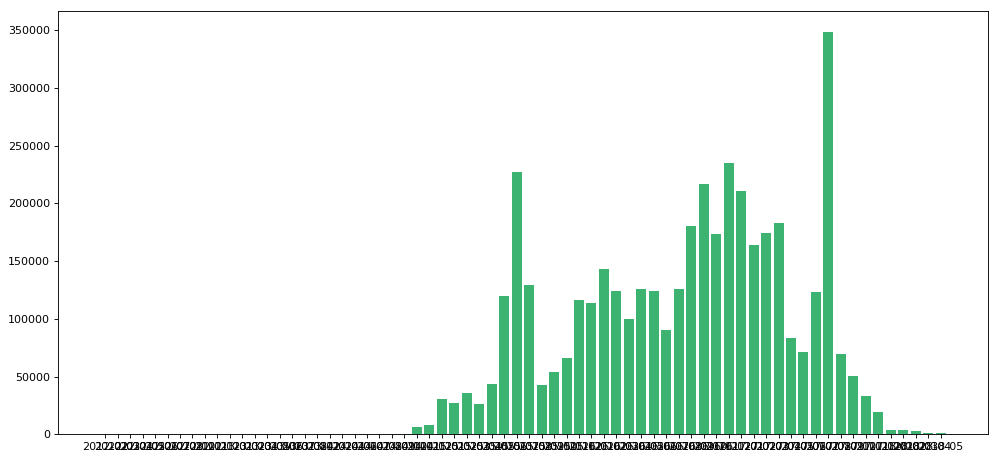

In [48]:
figure(num=None, figsize=(15, 7), dpi=80, facecolor='w', edgecolor='k')
plt.bar(month_count.index, month_count, color = "#3CB371")

#xmin, xmax = fig['layout']['xaxis']['range']

# create FigureWidget from fig
#f = go.FigureWidget(data=fig.data, layout=fig.layout)

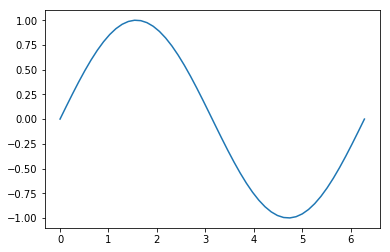

interactive(children=(FloatSlider(value=1.0, description='w', max=3.0, min=-1.0), Output()), _dom_classes=('wi…

In [43]:
x = np.linspace(0, 2 * np.pi)
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, np.sin(x))

def update(w = 1.0):
    line.set_ydata(np.sin(w * x))
    fig.canvas.draw()

interact(update);


In [12]:
def name_axises(title, xlab, ylab):
    plt.title(title, size=22), plt.xlabel(xlab, size=20), plt.ylabel(ylab, size=20)
# A function for future plotting to save some lines.

In [62]:
english_parqdata["publish_date"]

3623165   2012-02-06 20:24:00
687349    2012-02-06 20:24:00
687369    2012-02-07 13:24:00
3623185   2012-02-07 13:24:00
3623207   2012-02-08 13:37:00
687391    2012-02-08 13:37:00
3622749   2012-02-14 12:45:00
686933    2012-02-14 12:45:00
3623075   2012-02-29 14:32:00
687259    2012-02-29 14:32:00
3623988   2012-03-07 14:42:00
688172    2012-03-07 14:42:00
688194    2012-03-08 14:25:00
3624010   2012-03-08 14:25:00
687494    2012-03-12 05:32:00
3623310   2012-03-12 05:32:00
687603    2012-03-16 12:42:00
687604    2012-03-16 12:42:00
3623420   2012-03-16 12:42:00
3623419   2012-03-16 12:42:00
687706    2012-03-19 13:28:00
3623522   2012-03-19 13:28:00
687707    2012-03-19 13:32:00
3623523   2012-03-19 13:32:00
3623570   2012-03-20 15:29:00
687754    2012-03-20 15:29:00
4263668   2012-03-24 07:54:00
1327852   2012-03-24 07:54:00
687865    2012-03-24 23:31:00
3623681   2012-03-24 23:31:00
                  ...        
1495498   2018-05-29 20:02:00
4431314   2018-05-29 20:02:00
1495500   

In [74]:
#timedate_obj = datetime.strptime('06/14/2016 00:00', '%m/%d/%Y\n%H:%M')
after_primaries = english_parqdata.loc[english_parqdata["publish_date"] > "2016-06-14"]
after_primaries

,level_0,account_category,account_type,author,content,external_author_id,followers,following,language,post_type,publish_date,region,updates
1517127,1517127,NewsFeed,local,KANSASDAILYNEWS,Kansas candidates get lessons in school fundin...,2.587844e+09,24995,10301,English,ORIGINAL,2016-06-14 00:01:00,United States,37582
5401662,273928,NewsFeed,local,SEATTLE_POST,"Falling to fourth, Washington men’s rowing was...",2.611151e+09,16518,9438,English,ORIGINAL,2016-06-14 00:01:00,United States,25801
2465846,2465846,NewsFeed,local,SEATTLE_POST,"Falling to fourth, Washington men’s rowing was...",2.611151e+09,16518,9438,English,ORIGINAL,2016-06-14 00:01:00,United States,25801
4452943,369994,NewsFeed,local,KANSASDAILYNEWS,Kansas candidates get lessons in school fundin...,2.587844e+09,24995,10301,English,ORIGINAL,2016-06-14 00:01:00,United States,37582
5798339,305002,RightTroll,Right,WILLIAMS_DIANA_,Headline from Turkish newspaper: 'Death toll r...,7.030000e+17,927,3710,English,ORIGINAL,2016-06-14 00:02:00,United States,39
2862523,2862523,RightTroll,Right,WILLIAMS_DIANA_,Headline from Turkish newspaper: 'Death toll r...,7.030000e+17,927,3710,English,ORIGINAL,2016-06-14 00:02:00,United States,39
736554,736554,NewsFeed,local,DAILYSANDIEGO,Sanders spending night of final primary meetin...,2.630842e+09,15054,8492,English,ORIGINAL,2016-06-14 00:04:00,United States,16283
3672370,355538,NewsFeed,local,DAILYSANDIEGO,Sanders spending night of final primary meetin...,2.630842e+09,15054,8492,English,ORIGINAL,2016-06-14 00:04:00,United States,16283
1627452,1627452,LeftTroll,left,LGBTUNITEDCOM,If Xena was the reason why kids in the 90's ha...,4.856781e+09,1875,1342,English,ORIGINAL,2016-06-14 00:05:00,Unknown,596
4563268,91867,LeftTroll,left,LGBTUNITEDCOM,If Xena was the reason why kids in the 90's ha...,4.856781e+09,1875,1342,English,ORIGINAL,2016-06-14 00:05:00,Unknown,596


In [77]:
after_primaries_left = after_primaries.loc[after_primaries["account_type" == local]]

NameError: name 'local' is not defined

In [46]:
out1 = widgets.Output()
out2 = widgets.Output()
data1 = pd.DataFrame(np.random.normal(size = 50))
data2 = pd.DataFrame(np.random.normal(size = 100))

tab = widgets.Tab(children = [out1, out2])
tab.set_title(0, 'First')
tab.set_title(1, 'Second')
display(tab)

with out1:
    fig1, axes1 = plt.subplots()
    data1.hist(ax = axes1)
    plt.show(fig1)

with out2:
    fig2, axes2 = plt.subplots()
    data2.hist(ax = axes2)
    plt.show(fig2)